<div align="center">

# ***Preprocessing Data & Features Engineering***
> Dataset: Pima Indians Diabetes

---
---

</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and feature engineering
import sklearn.preprocessing as skl_pre

# For getting path of dataset
import os 
from pathlib import Path

In [2]:
# Get path of data:  /home/nii/Documents/SGU_2025_ML-Fundamentals/dataset/diabetes.csv
path_working_file = Path.cwd()
path_current_ws = path_working_file.resolve().parent
path_dataset_diabetes = path_current_ws.resolve().joinpath("./dataset/diabetes.csv")
# Check the path
if not os.path.exists(path_dataset_diabetes):
    raise FileNotFoundError(f"Dataset not found at {path_dataset_diabetes}")
else:
    print("Dataset found at:", path_dataset_diabetes)

Dataset found at: /home/nii/Documents/SGU_2025_ML-Fundamentals/dataset/diabetes.csv


In [3]:
# Load data 
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(path_dataset_diabetes, names=names)

data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **I. Preprocessing Data**

In [10]:
data_arr = data.values
# Split data into X-input and Y-output
X = data_arr[:, 0:8]    # [0,7] cols, data has 8 columns
Y = data_arr[:, 8]

## 1. Rescale Data

- Load the data
- Split data to input and output variables  
- Pre-processing transform to the input vars: *MinMaxScaler* - [0, 1]: 

$$
x_i' = \frac{x_i - x_{\min}}{x_{\max} - x_{\min}} 
$$

In [12]:
### Rescale data using MinMaxScaler ###
# Call sklearn to rescale
scaler_minmax = skl_pre.MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler_minmax.fit_transform(X)

# Show the result
np.set_printoptions(precision=3)
# Print the first 5 rows
print(X_rescaled[0:5, :])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [5]:
# Standardize data: Gaussian Distribution 
# scaler_std = skl_pre.StandardScaler().fit(X)
scaler_std = skl_pre.StandardScaler()
X_std = scaler_std.fit_transform(X)

np.set_printoptions(precision=3)
print(X_std[0:5, :])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [6]:
# Normalize data, using Norm L2
scaler_norm = skl_pre.Normalizer()
X_norm = scaler_norm.fit_transform(X)

np.set_printoptions(precision=3)
print(X_norm[0:5, :])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [7]:
# Binarize data
THRESHOLD = 0.0
scaler_binarizer = skl_pre.Binarizer(threshold=THRESHOLD)
X_binarizer = scaler_binarizer.fit_transform(X)

np.set_printoptions(precision=3)
print(X_binarizer[-5:, :])

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]]


- Visualize the different between data before and after transforms

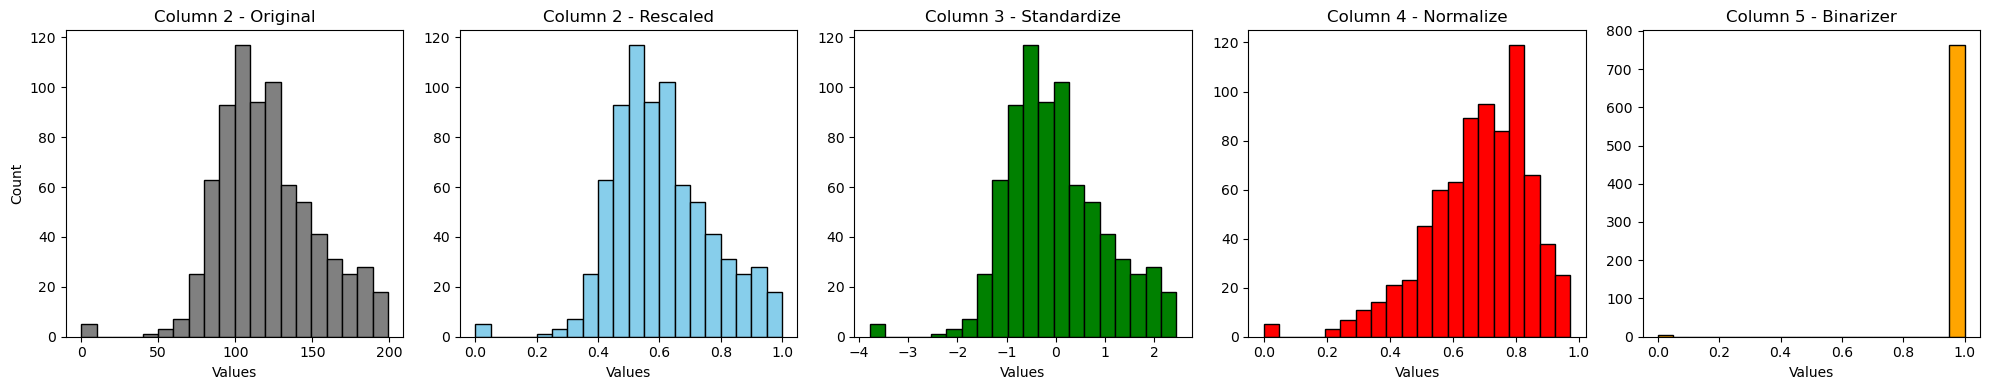

In [8]:
NUM_PLOTS = 5
BINS = 20
# Compared column
COL = 1

plt.figure(figsize=(20,4))

plt.subplot(1,NUM_PLOTS,1)
plt.hist(X[:, COL], bins=BINS, color="grey", edgecolor="black")
plt.title("Column 2 - Original")
plt.xlabel("Values")
plt.ylabel("Count")

plt.subplot(1,NUM_PLOTS,2)
plt.hist(X_rescaled[:, COL], bins=BINS, color="skyblue", edgecolor="black")
plt.title("Column 2 - Rescaled")
plt.xlabel("Values")

plt.subplot(1,NUM_PLOTS,3)
plt.hist(X_std[:, COL], bins=BINS, color="green", edgecolor="black")
plt.title("Column 3 - Standardize")
plt.xlabel("Values")

plt.subplot(1,NUM_PLOTS,4)
plt.hist(X_norm[:, COL], bins=BINS, color="red", edgecolor="black")
plt.title("Column 4 - Normalize")
plt.xlabel("Values")

plt.subplot(1,NUM_PLOTS,5)
plt.hist(X_binarizer[:, COL], bins=BINS, color="orange", edgecolor="black")
plt.title("Column 5 - Binarizer")
plt.xlabel("Values")

plt.tight_layout()
plt.show()


&rarr; We can see that: distribution of data not significantly change(except binarizer), but values range is scaled to [0, 1]

# **II. Features Engineering**

## 1. Univariate Selection (chi-squared)

$$
\chi^2 = \sum \frac{(O - E)^2}{E}
$$

- Compare each features with output to select the n best features which have the strongest correlation with output

In [24]:
from sklearn import feature_selection as skl_f_select


k = 4
# Create SelectKBest object with chi2 func and k = 4
k_best_chi2 = skl_f_select.SelectKBest(score_func=skl_f_select.chi2, k=k)
# Fit data 
fit_k_chi2 = k_best_chi2.fit(X, Y)

# Get scores of this selection
np.set_printoptions(precision=3)
print(fit_k_chi2.scores_)

# Show the 4 highest scores columns name 
scores = fit_k_chi2.scores_
# Sort the index by values in each index => index array
top_k_idx = np.argsort(scores)[::-1][:k]
top_names = [names[index] for index in top_k_idx]
print(f"Features names after select: {top_names}")

# Select features which have the highest scores
features_chi2 = fit_k_chi2.transform(X)
print("Features after selection using chi2: \n", features_chi2)



[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
Features names after select: ['test', 'plas', 'age', 'mass']
Features after selection using chi2: 
 [[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


## 2. Recursive Features Elimination - RFE

- Recursively remove '*weak*' features until 'k'

In [47]:
from sklearn import feature_selection as skl_f_select
from sklearn import linear_model as skl_lin_model

# Using Logistic Regression model for eliminate 
logistic_reg_model = skl_lin_model.LogisticRegression()
# Create RFE object with logistic_reg_model and k = 3
rfe = skl_f_select.RFE(logistic_reg_model, n_features_to_select=3)
# Fit RFE with data
fit_rfe = rfe.fit(X, Y)

# Show the results:
print(f"Num features: {fit_rfe.n_features_}")
print(f"Feature ranking: {fit_rfe.ranking_}")
print(f"Selected features: {fit_rfe.support_}")

# Get feature names selected by RFE (exclude 'class' column)
selected_feature_names = [names[i] for i, x in enumerate(fit_rfe.support_[:8]) if x]
print(f"Features after selection using RFE: {selected_feature_names}")



Num features: 3
Feature ranking: [1 2 4 5 6 1 1 3]
Selected features: [ True False False False False  True  True False]
Features after selection using RFE: ['preg', 'mass', 'pedi']


/home/nii/anaconda3/envs/conda_sgu_ml_2025/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nii/anaconda3/envs/conda_sgu_ml_2025/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-

## Principal Component Analysis - PCA

Find the new principal component to present the largest data with smaller dimensions than the source data

&rarr; Using `eigenvalues & eigenvectors` of the covariance matrix

1. Data standardization 

$$
x_i' = \frac{x_i - \mu}{\sigma}
$$

2. Compute the covariance matrix of X (to measures 'how they change together')

3. Find `eigenvalues ~ variances` & `eigenvectors ~ principal component` using SVD (in sklearn)

$$
\text{Total Variance} = \sum_{i=1}^{d} \lambda_i 
$$

- *explained_variance_ratio* show how many percent of variances the principal component (eigenvector) can keep.
$$
\text{explained\_variance\_ratio}_i = \frac{\lambda_i}{\sum_{j=1}^{d} \lambda_j}
$$


4. Sort `eigenvalues & eigenvectors`

5. Select K dimension 


In [60]:
from sklearn import decomposition as skl_decom 

k = 3
pca = skl_decom.PCA(n_components=k)
fit_pca = pca.fit(X)

# Summarize components
print(f"Explained variance: \n{fit_pca.explained_variance_ratio_}")
# Eigenvectors
print(f"Principal components - eigenvectors: \n{fit_pca.components_}")

Explained variance: 
[0.889 0.062 0.026]
Principal components - eigenvectors: 
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [ 2.265e-02  9.722e-01  1.419e-01 -5.786e-02 -9.463e-02  4.697e-02
   8.168e-04  1.402e-01]
 [ 2.246e-02 -1.434e-01  9.225e-01  3.070e-01 -2.098e-02  1.324e-01
   6.400e-04  1.255e-01]]


&rarr; The first PC, PC1, can keep 88,9% percent of variances. So, choose this PC

## Features Importance

Measure the contribution of each features to the model's result

In [66]:
from sklearn import ensemble as skl_ens

random_forest_model = skl_ens.RandomForestClassifier()
random_forest_model.fit(X, Y)

# Get the scores of all features 
features_scores = random_forest_model.feature_importances_
print(f"Features scores: \n{features_scores}")

# Get index of k = 3 features have the highest scores
idx_features_rank = np.argsort(features_scores)[::-1][:k]
# Get they name 
features_names = [names[index] for index in idx_features_rank]

print(f"Features names after selection: {features_names}")

Features scores: 
[0.079 0.259 0.095 0.072 0.068 0.165 0.124 0.137]
Features names after selection: ['plas', 'mass', 'age']
